In [12]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import micromagneticdata as md

In [2]:
region = df.Region(p1=(-50e-9, -50e-9, -50e-9), p2=(50e-9, 50e-9, 50e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system=mm.System(name="hysteresis")
system.energy = (mm.Exchange(A=1.6e-12) + mm.UniaxialAnisotropy(K=4e5, u=(0,0,1))+mm.DMI(D=1e-3,crystalclass="T"))#+mm.Demag()

def Ms_fun(point):
    x, y, z = point
    if x**2 + y**2 + z**2 <= 50e-9**2:
        return 1e6
    else:
        return 0
    
system.m = df.Field(mesh, nvdim=3, value=(0, 0, -1), norm=Ms_fun, valid="norm")


In [4]:
Hmin = (0,0,-1/mm.consts.mu0)
Hmax = (0,0,1/mm.consts.mu0)

In [5]:
n=21

OOMMFTCL is set, but OOMMF could not be run.
stdout:
b''
stderr:
b'couldn\'t read file "C:\\Users\\Sagar Nanda\\Downloads\\oommf20b0_20220930\\oommf\\oommf.tcl": no such file or directory\r\n'


Running OOMMF (ExeOOMMFRunner)[2025/01/17 18:36]... (8.0 s)


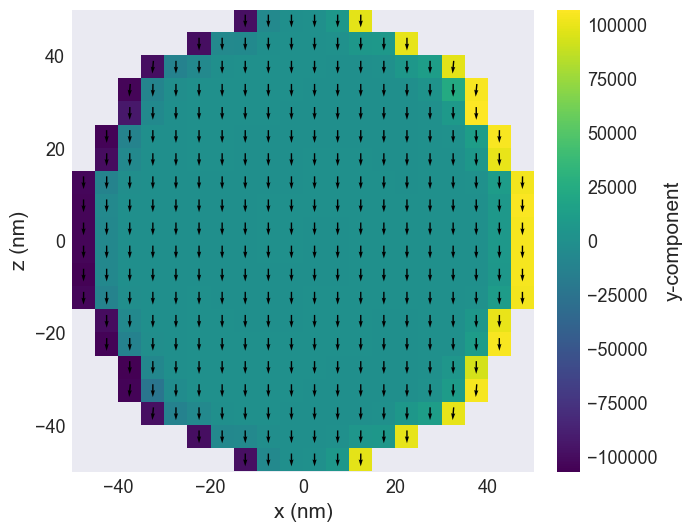

In [7]:
hd=oc.HysteresisDriver()
hd.drive(system, Hmin=Hmin, Hmax=Hmax, n=n)
system.m.sel("y").mpl()

In [8]:
system.table.data.head()

,max_mxHxm,E,delta_E,bracket_count,line_min_count,conjugate_cycle_count,cycle_count,cycle_sub_count,energy_calc_count,E_exchange,...,B_hysteresis,Bx_hysteresis,By_hysteresis,Bz_hysteresis,iteration,stage_iteration,stage,mx,my,mz
0,0.061627,-5.295593e-16,-9.860761e-32,10.0,9.0,1.0,9.0,8.0,20.0,1.598532e-19,...,1000.0,0.0,0.0,-1000.0,19.0,19.0,0.0,0.000000e+00,-5.236485e-19,-0.998514
1,0.097945,-4.768420e-16,-2.958228e-31,18.0,16.0,2.0,16.0,6.0,36.0,1.753075e-19,...,900.0,0.0,0.0,-900.0,34.0,14.0,1.0,-2.204836e-19,6.752309e-19,-0.998349
2,0.061029,-4.241341e-16,-3.944305e-31,27.0,23.0,3.0,24.0,7.0,53.0,1.931946e-19,...,800.0,0.0,0.0,-800.0,50.0,15.0,2.0,1.102418e-19,5.236485e-19,-0.998154
3,0.091829,-3.714375e-16,-9.860761e-31,35.0,30.0,4.0,32.0,7.0,69.0,2.140752e-19,...,700.0,0.0,0.0,-700.0,66.0,15.0,3.0,-2.204836e-19,4.960880e-19,-0.997922
4,0.065790,-3.187544e-16,-1.479114e-31,43.0,38.0,5.0,40.0,7.0,86.0,2.386897e-19,...,600.0,0.0,0.0,-600.0,83.0,16.0,4.0,0.000000e+00,-1.378022e-19,-0.997641


In [9]:
system.table.data["B_hysteresis"]

0     1000.0
1      900.0
2      800.0
3      700.0
4      600.0
5      500.0
6      400.0
7      300.0
8      200.0
9      100.0
10       0.0
11     100.0
12     200.0
13     300.0
14     400.0
15     500.0
16     600.0
17     700.0
18     800.0
19     900.0
20    1000.0
21     900.0
22     800.0
23     700.0
24     600.0
25     500.0
26     400.0
27     300.0
28     200.0
29     100.0
30       0.0
31     100.0
32     200.0
33     300.0
34     400.0
35     500.0
36     600.0
37     700.0
38     800.0
39     900.0
40    1000.0
Name: B_hysteresis, dtype: float64

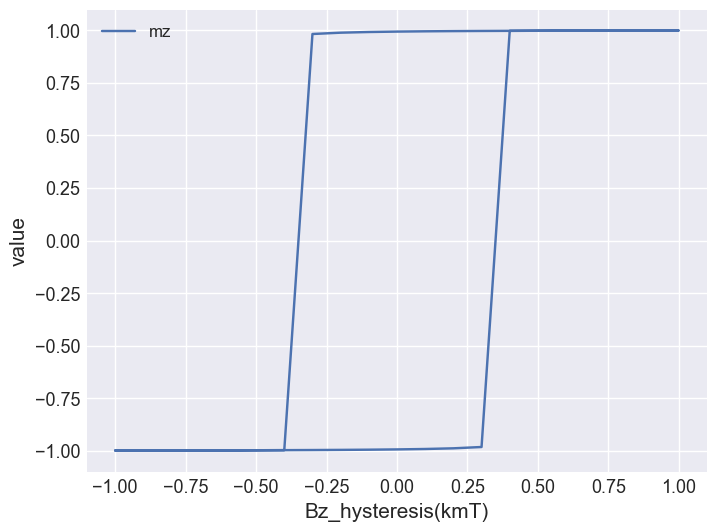

In [11]:
system.table.mpl(y=["mz"],x="Bz_hysteresis")


In [14]:
data=md.Data(name=system.name)

In [15]:
data.info

,drive_number,date,time,driver,adapter,Hsteps,n_threads
0,0,2025-01-17,18:36:28,HysteresisDriver,oommfc,"[[[0, 0, -795774.7154594767], [0, 0, 795774.71...",None


In [16]:
drive=data[0]

In [17]:
drive.n

41

In [18]:
drive.hv(kdims=["x","y"])

BokehModel(combine_events=True, render_bundle={'docs_json': {'f516baed-79d9-4a48-ba26-b569894be718': {'version…

In [23]:
hd.drive(system, Hsteps = [[(0,0,0),Hmax,10], [Hmax,Hmin,10],[Hmin,Hmax,20]], overwrite=True)

Running OOMMF (ExeOOMMFRunner)[2025/01/17 19:00]... (7.4 s)


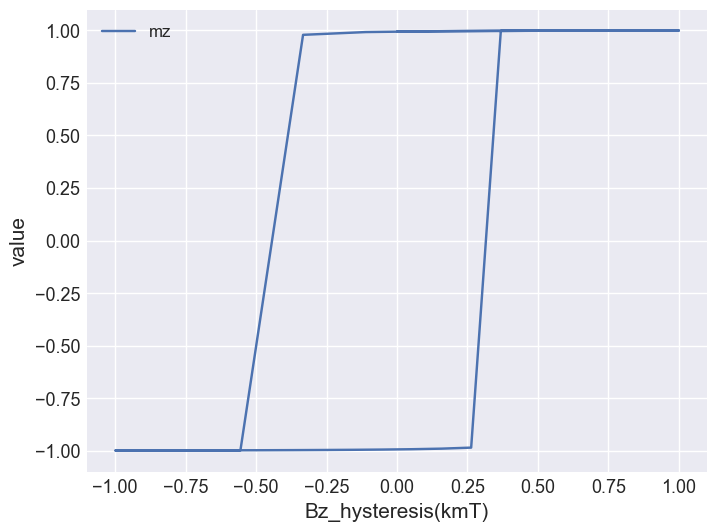

In [24]:
system.table.mpl( x="Bz_hysteresis", y=["mz"])